## Generate GB CSL hkl
1. `l_Cbpb_Cp`: Basis of the 2D lattice in the CSLp reference frame for the given (hkl) plane.
2. `l_CRbpb_Cp`: Basis of the 2D lattice such that the basis vectors have length that is greater than rCut and the basis vectors are similar in lengths and the angle between them is close to 90. Defined in the CSLp reference frame

In [1]:
import byxtal.tools as gbt
import byxtal.lattice as gbl
import pickle as pkl
import numpy as np
import numpy.linalg as nla
import byxtal.misorient_fz as mfz
import gbpy.generate_hkl_indices as ghi
import gbpy.util_funcs_create_byxtal as uf


In [2]:
########################################################################
l1=gbl.Lattice('Al')
pkl_name = l1.elem_type+'_byxtal_props.pkl'
jar = open(pkl_name, 'rb');

csl_props = pkl.load(jar)
sig_mats = csl_props['sig_mats']
csl_mats = csl_props['csl_mats']
dsc_mats = csl_props['dsc_mats']
bxt_symm_props = csl_props['csl_symm_props']
jar.close()
########################################################################

########################################################################
pkl_name = 'bp_list_' + l1.elem_type + '.pkl'
jar = open(pkl_name, 'rb');

bp_list = pkl.load(jar)
l_p_po = bp_list['l_p_po']
hkl_sig_inds = bp_list['miller_inds']

jar.close()
########################################################################


In [3]:
l1 = gbl.Lattice('Al')
lat_par = l1.lat_params['a']
rCut = lat_par*3
A_cut = (rCut+lat_par)**2

l_p_po = l1.l_p_po
l_po_p = nla.inv(l_p_po)


In [4]:
s1_keys = list(hkl_sig_inds.keys())
ind1 = 0
sig_id = s1_keys[ind1]
hkl_inds = hkl_sig_inds[sig_id]
l_csl_p1 = csl_mats[sig_id]
l_csl_po1 = l_p_po.dot(l_csl_p1)

tct1 = 0
hkl1 = np.zeros((1,3), dtype='int64')
hkl1[0,:] = hkl_inds[tct1,:]

In [34]:
# for num_ct in range(len(hkl_inds)):
#     tct1 = num_ct
#     hkl1 = np.zeros((1,3), dtype='int64')
#     hkl1[0,:] = hkl_inds[tct1,:]
#     print(num_ct)
#     print(hkl1)
#     l_CSLbpb_CSLp = {}
#     l_CSLbpbSig_CSLp = {}

#     l_CSLbpb_CSLp_mat = ghi.compute_hkl_bpb(hkl1)
#     l_CSLbpbSig_CSLp_mat = ghi.gen_Acut_bpb(l_CSLbpb_CSLp_mat, l_csl_po1, rCut, A_cut)

#     l_Cbpb_Cp  = l_CSLbpb_CSLp_mat[0]
#     l_CRbpb_Cp = l_CSLbpbSig_CSLp_mat[0]

#     l_bp_po1 = l_csl_po1.dot(l_CRbpb_Cp)

#     symm_grp_ax = bxt_symm_props[sig_id]['symm_grp_ax'];
#     bp_symm_grp = bxt_symm_props[sig_id]['bxt_symm_grp'];

#     l_p2_p1 = sig_mats[sig_id]
#     gb_ID = uf.get_gb_uID(l1, l_bp_po1, l_p2_p1, l_p_po, bp_symm_grp, symm_grp_ax, sig_id)
#     print(gb_ID)

In [5]:
l_CSLbpb_CSLp = {}
l_CSLbpbSig_CSLp = {}

l_CSLbpb_CSLp_mat = ghi.compute_hkl_bpb(hkl1)
l_CSLbpbSig_CSLp_mat = ghi.gen_Acut_bpb(l_CSLbpb_CSLp_mat, l_csl_po1, rCut, A_cut)

l_Cbpb_Cp  = l_CSLbpb_CSLp_mat[0]
l_CRbpb_Cp = l_CSLbpbSig_CSLp_mat[0]

l_bp_po1 = l_csl_po1.dot(l_CRbpb_Cp)

symm_grp_ax = bxt_symm_props[sig_id]['symm_grp_ax'];
bp_symm_grp = bxt_symm_props[sig_id]['bxt_symm_grp'];

l_p2_p1 = sig_mats[sig_id]
gb_ID = uf.get_gb_uID(l1, l_bp_po1, l_p2_p1, l_p_po, bp_symm_grp, symm_grp_ax, sig_id)

IndexError: list index out of range

In [36]:
np.cross(l_bp_po1[:,0], l_bp_po1[:,1])

array([-270.64125,   24.60375,   24.60375])

In [18]:
zCut = 25*l1.lat_params['a']

threeD_upts, sim_cell2 = uf.create_half_cryst(l_csl_p1, l_CRbpb_Cp, l_p_po, 'upper', zCut)

l_p1_p2 = nla.inv(l_p2_p1)
l_csl_p2 = l_p1_p2.dot(l_csl_p1)
threeD_lpts, sim_cell1 = uf.create_half_cryst(l_csl_p2, l_CRbpb_Cp, l_p_po, 'lower', zCut)


In [19]:
gb_attr = {}
gb_attr['cell'] = sim_cell1
gb_attr['upts'] = threeD_upts
gb_attr['lpts'] = threeD_lpts

pkl_name = 'gb_attr_'+gb_ID+'.pkl'
jar = open(pkl_name,'wb')
pkl.dump(gb_attr, jar)
jar.close()

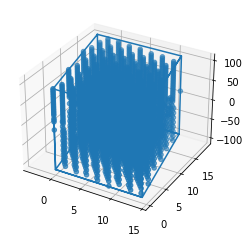

In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import plotting_routines as plr
%matplotlib inline

threeD_pts = np.vstack((threeD_upts, threeD_lpts))
sim_orig = sim_cell1[:,3]
sim_cell = sim_cell1[:,0:3]
fig1 = plt.figure()
plr.plot_3d_pts_box(fig1, threeD_pts, sim_cell, sim_orig)
plt.show()


In [10]:
l1.lat_params

{'a': 4.05,
 'b': 4.05,
 'c': 4.05,
 'alpha': 1.5707963267948966,
 'beta': 1.5707963267948966,
 'gamma': 1.5707963267948966}

In [12]:
import os
import byxtal
# path = os.path.dirname(byxtal.__file__)+'/tests/';
path = os.path.dirname(byxtal.__file__)+'/data_files/'
csl_pkl = path+l1.pearson+'_Id_csl_common_rotations.pkl'
jar = open(csl_pkl,'rb')
s1=pkl.load(jar)
jar.close()

In [13]:
tct1 = 3
t1_num = t_num[tct1]
bpn_po1 = bpn_list[tct1]

sig_id = s1_keys[t1_num]
print("Sig ID: "+ str(t1_num) + " -- "+ sig_id)
 

NameError: name 't_num' is not defined

In [14]:

l_csl_p1 = csl_mats[sig_id];
l_csl_po1 = l_p_po.dot(l_csl_p1)


##############################################################################
#### From MBP
sig_id = s1_keys[t1_num]
l_rp_po = fcd.reciprocal_mat(l_csl_po1)
l_po_rp = nla.inv(l_rp_po)
norm_uvec = bpn_po1/bpn_po1.norm()
n1_rp = l_po_rp*norm_uvec
hkl_ind = iman.int_finder(n1_rp)
hkl1 = (np.array(hkl_ind, dtype='double')).T

import gbpy.generate_hkl_indices as ghi
# l_CSLbpb_CSLp = ghi.compute_hkl_bpb(hkl1);
l_Cbpb_Cp = ghi.compute_hkl_bpb(hkl1)
l_CSLbpbSig_CSLp = ghi.gen_Acut_bpb(l_Cbpb_Cp, l_csl_po1, rCut, A_cut)
l_CRbpb_Cp=l_CSLbpbSig_CSLp[0]

##############################################################################

l_bp_po1 = l_csl_po1*l_CRbpb_Cp;

symm_grp_ax = csl_bp_props[sigr_id]['symm_grp_ax'];
bp_symm_grp = csl_bp_props[sig_id]['bp_symm_grp'];

l_p2_p1 = Matrix(sig_mats[sig_id]);
gb_ID = uf.get_gb_uID(l_bp_po1, l_p2_p1, l_p_po, bp_symm_grp, symm_grp_ax, sig_id);
print(gb_ID);

NameError: name 't1_num' is not defined

In [6]:
zCut = 25*l1.lat_params['a'];

threeD_upts, sim_cell2 = uf.create_half_cryst(l_csl_p1, l_CRbpb_Cp, l_p_po, 'upper', zCut)

l_p1_p2 = l_p2_p1.inv(); l_csl_p2 = l_p1_p2*l_csl_p1;
threeD_lpts, sim_cell1 = uf.create_half_cryst(l_csl_p2, l_CRbpb_Cp, l_p_po, 'lower', zCut)

pkl_name = 'gb_attr_'+gb_ID+'.pkl';
jar = open(pkl_name,'wb'); pkl.dump(gb_attr, jar); jar.close();

gb_attr = {};
gb_attr['cell'] = sim_cell1;
gb_attr['upts'] = threeD_upts;
gb_attr['lpts'] = threeD_lpts;

### Convert CSL-BP to 

The boundary-plane can be described in different lattices and conventions

1. As planar Miller-indices in $\mathcal{B}_{csl}$
2. As planar Miller-indices in $\mathcal{B}_{p}$
3. As planar Miller-indices in $\mathcal{B}_{po}$
4. As direction Miller-indices of the normal vector in $\mathcal{B}_{p}$
5. As direction Miller-indices of the normal vector in $\mathcal{B}_{po}$


### If we want the global Y-axis to be perpendicular to the GB

In [7]:
### Points with Y-axis perpendicular to the GB
rot_mat = np.array([[1.0, 0, 0], [0, 0.0, -1.0], [0, 1.0, 0.0]])
threeD_lypts = (np.dot(rot_mat, threeD_upts.transpose())).transpose();
threeD_uypts = (np.dot(rot_mat, threeD_lpts.transpose())).transpose();

sim_cell2 = 0*sim_cell1
sim_cell2[:,0] = sim_cell1[:,0]

sim_cell2[0,1] = sim_cell1[0,2]
sim_cell2[1,1] = sim_cell1[2,2]
sim_cell2[2,1] = sim_cell1[1,2]

sim_cell2[0,2] = sim_cell1[0,1]
sim_cell2[1,2] = sim_cell1[2,1]
sim_cell2[2,2] = sim_cell1[1,1]
sim_cell2[1,3] = sim_cell1[2,3]

gbY_attr = {};
gbY_attr['cell'] = sim_cell2;
gbY_attr['upts'] = threeD_lypts;
gbY_attr['lpts'] = threeD_uypts;

pkl_name = 'gbY_attr_'+gb_ID+'.pkl';
jar = open(pkl_name,'wb'); pkl.dump(gbY_attr, jar); jar.close();